In [25]:
# Question 1 Calculations
# Estimation of the value of Integral[0:2]cos(x) dx
# The above can be rewritten as form 2* Integral[0:2] (1/2* cos(x)) = 2*E(cos(x)) under X uniform distribution
# Above can be estimated Monte Carlo methods using 2*(1/n)*summed(cos(Xi)) each Xi..Xn sampled from uniform distribution

# import modules for us
import numpy as np
import math
from scipy.stats import uniform

# Actual solution 
actual_solution   = math.sin(2)

# Seed random variable to produce similar results
np.random.seed(0)

# Estimates are based on formule np.cos(sampled_uniform_random_variable_between_0_and_2)

# Generate sample sizes ranging from 1000,50000
samples           = [i*1000 for i in range(1,51)]
# Generate Xi from uniform distribution for each sample size n between 0-2
uniform_array     = [uniform.rvs(size=samples[i])*2 for i in range(50)]
# Generate estimates for integral for each sample size
estimates         = [np.cos(uniform_array[i])*2 for i in range(50)]
# Generate an estimate the mean(average of the smaples estimates value) for each sample size 
estimate          = [np.mean(estimates[i]) for i in range(50)]
# Generate the standard deviation for the estimates at each sample size
std               = [np.std(estimates[i])/np.sqrt((i+1)*1000) for i in range(50)]

# Generate upper and lower Confidence Intervals at the 99.7% level
upper_CI          = [actual_solution + 3*std[i] for i in range(50)]
lower_CI          = [actual_solution - 3*std[i] for i in range(50)]


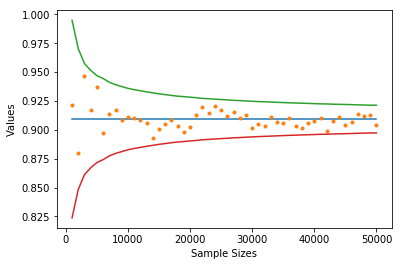

In [26]:
# Question 1 Plots

# import moduled
import matplotlib.pyplot as plt

plt.plot(samples,[actual_solution]*50)
plt.plot(samples,estimate,'.')
plt.plot(samples,upper_CI)
plt.plot(samples,lower_CI)
plt.xlabel("Sample Sizes")
plt.ylabel("Values")
plt.show()


In [75]:
# Question 2 Calculations Monte Carlo estimation European put option
# Assume Geometric Brownian motion for stock prices 
# From above assumption terminal price at time T can be estimated by,  S_T = np.exp((r-sigma**2/2) + sigma*np.sqrt(T)*Z)
# Z is random samples from standard normal distribution Z~N(0,1)

# import modules for use
from scipy.stats import norm
np.random.seed(0)

# Parameters for put option pricing
sigma = 0.3   # volatility of stock
r     = 0.1   # risk free rate 
mu    = 0.15  # average stock returns
S_0   = 100   # current share price
K     = 110   # Strike price European put option
T     = 0.5   # Term of contract  = 6 monthns = 6/12 = 0.5 years

# Function to determine terminal stock price
def terminal_stock_price(S_0,r,sigma,T,Z):
    return S_0*(np.exp((r-sigma**2/2)*(T) + sigma*np.sqrt(T)*Z))

# Function to calculate discounted payoff
def discounted_put_payoff(S_T,K, r, T):
    return np.exp(-r*T) * np.maximum(K-S_T,0)
    

In [77]:
# Estimation European put option using Monte Carlo simulation

# Generate various sample sizes from 1000 to 50000
varying_sample_n = list(range(1000,51000,1000))
# Sample from normal distribution for each sample size n
normal_per_n     = [norm.rvs(size=i) for i in varying_sample_n]

# Calculate terminal values for each sample sizes
terminal_value   = [terminal_stock_price(S_0,r,sigma,T,normal_per_n[i]) for i in range(50)]

# Calculate discounted payoff values for each sample sizes
put_values       = [discounted_put_payoff(terminal_value[i],K,r,T) for i in range(50)]

# Calculate estimates of put option price for each sample size
put_estimates    = [np.mean(put_values[i]) for i in range(50)]

#Calculate Standard Deviation of estimates
std              = [np.std(put_values[i])/np.sqrt((i+1)*1000) for i in range(50)]


In [78]:
# Analytical put value given by K*exp(-r*T)*NormCDF(-d2) - S_0*NormCDF(-d1)

# import modules
import math

# Calculate values of d1 and d2
d1 = (math.log(S_0/K) + (r+sigma**2/2)*(T))/sigma*math.sqrt(T)
d2 = d1 - sigma* math.sqrt(T)

#Calculate analytical price
analytic_price = K*norm.cdf(-d2)*math.exp(-r*T)-S_0*norm.cdf(-d1)

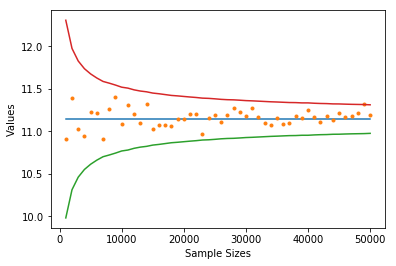

In [79]:
# Plot of estimates

#import modules
import matplotlib.pyplot as plt

# calculate upper and lower confidene interval
upper_CI  = [analytic_price + 3*std[i] for i in range(50)]
lower_CI  = [analytic_price - 3*std[i] for i in range(50)]

# plots
plt.plot(varying_sample_n, [analytic_price]*50)
plt.plot(varying_sample_n,put_estimates,'.')
plt.plot(varying_sample_n,lower_CI)
plt.plot(varying_sample_n,upper_CI)
plt.xlabel("Sample Sizes")
plt.ylabel("Values")
plt.show()